## Краткий отчет по лабораторной работе

### Шаги очистки и нормализации

   - объединение таблиц ответов и вопросов по ключам `ParentId` и `Id` с помощью `merge`
   - удаление HTML-тегов с помощью регулярных выражений
   - перевод текста в нижний регистр
   - удаление не буквенных символов (оставляем только a-z и пробелы)
   - токенизация (разбиение строки на слова)
   - удаление стоп-слов из корпуса NLTK
   - объединение токенов обратно в строку

### Основные статистические выводы
- Количество вопросов: 1264216
- Среднее число ответов на вопрос: 1.83
- У большинства вопросов рейтинг <1000
- Самые популярные категории вопросов:
    - Языки программирования: 617267
    - Веб-разработка: 351046
    - Мобильная разработка: 206516
- Средняя длина вопроса: 1284.6633826685913
- Средняя длина ответа: 741.8621520007783

    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

answers = pd.read_csv('Answers.csv',encoding='latin1')
questions = pd.read_csv('Questions.csv', encoding='latin1')
tags = pd.read_csv('Tags.csv', encoding='latin1')

In [3]:
print(answers.head())

    Id  OwnerUserId          CreationDate  ParentId  Score  \
0   92         61.0  2008-08-01T14:45:37Z        90     13   
1  124         26.0  2008-08-01T16:09:47Z        80     12   
2  199         50.0  2008-08-01T19:36:46Z       180      1   
3  269         91.0  2008-08-01T23:49:57Z       260      4   
4  307         49.0  2008-08-02T01:49:46Z       260     28   

                                                Body  
0  <p><a href="http://svnbook.red-bean.com/">Vers...  
1  <p>I wound up using this. It is a kind of a ha...  
2  <p>I've read somewhere the human eye can't dis...  
3  <p>Yes, I thought about that, but I soon figur...  
4  <p><a href="http://www.codeproject.com/Article...  


In [4]:
print(questions.head())

    Id  OwnerUserId          CreationDate            ClosedDate  Score  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN     26   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   
2  120         83.0  2008-08-01T15:50:08Z                   NaN     21   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN     53   
4  260         91.0  2008-08-01T23:22:08Z                   NaN     49   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  
0  <p>I've written a database generation script i...  
1  <p>Are there any really good tutorials explain...  
2  <p>Has anyone got experience creating <strong>... 

In [5]:
print(tags.head())

   Id             Tag
0  80            flex
1  80  actionscript-3
2  80             air
3  90             svn
4  90     tortoisesvn


In [6]:
qa_df = answers.merge(questions, left_on='ParentId', right_on='Id', suffixes=('_answer', '_question'))
print(qa_df.head())

   Id_answer  OwnerUserId_answer   CreationDate_answer  ParentId  \
0         92                61.0  2008-08-01T14:45:37Z        90   
1        124                26.0  2008-08-01T16:09:47Z        80   
2        199                50.0  2008-08-01T19:36:46Z       180   
3        269                91.0  2008-08-01T23:49:57Z       260   
4        307                49.0  2008-08-02T01:49:46Z       260   

   Score_answer                                        Body_answer  \
0            13  <p><a href="http://svnbook.red-bean.com/">Vers...   
1            12  <p>I wound up using this. It is a kind of a ha...   
2             1  <p>I've read somewhere the human eye can't dis...   
3             4  <p>Yes, I thought about that, but I soon figur...   
4            28  <p><a href="http://www.codeproject.com/Article...   

   Id_question  OwnerUserId_question CreationDate_question  \
0           90                  58.0  2008-08-01T14:41:24Z   
1           80                  26.0  2008-08-

In [7]:
import re
stop_words = set(stopwords.words('english'))

def clean_text(text: str)-> str:
    text = re.sub(r'<[^>]+>','', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]','', text)
    tokens = text.split()
    clean_text = ' '.join(tokens)
    tokens = [word for word in tokens if word not in stop_words]
    return clean_text

qa_df['clean_questions']=qa_df['Body_answer'].apply(clean_text)
qa_df['clear_answers']=qa_df['Body_question'].apply(clean_text)
print(qa_df.head())

   Id_answer  OwnerUserId_answer   CreationDate_answer  ParentId  \
0         92                61.0  2008-08-01T14:45:37Z        90   
1        124                26.0  2008-08-01T16:09:47Z        80   
2        199                50.0  2008-08-01T19:36:46Z       180   
3        269                91.0  2008-08-01T23:49:57Z       260   
4        307                49.0  2008-08-02T01:49:46Z       260   

   Score_answer                                        Body_answer  \
0            13  <p><a href="http://svnbook.red-bean.com/">Vers...   
1            12  <p>I wound up using this. It is a kind of a ha...   
2             1  <p>I've read somewhere the human eye can't dis...   
3             4  <p>Yes, I thought about that, but I soon figur...   
4            28  <p><a href="http://www.codeproject.com/Article...   

   Id_question  OwnerUserId_question CreationDate_question  \
0           90                  58.0  2008-08-01T14:41:24Z   
1           80                  26.0  2008-08-

In [8]:
num_questions = questions['Id'].nunique()
print(f'Количество вопросов: {num_questions}')
answers_per_question = answers.groupby('ParentId').size()
mean_answers = answers_per_question.mean()
print(f'Среднее число ответов на вопрос: {mean_answers:.2f}')

Количество вопросов: 1264216
Среднее число ответов на вопрос: 1.83


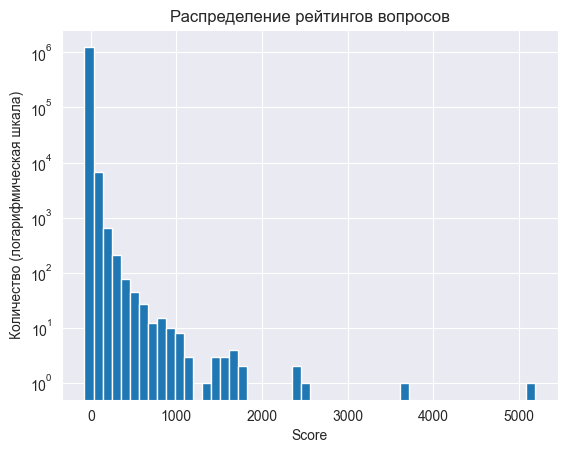

In [9]:
import matplotlib.pyplot as plt

plt.hist(questions['Score'], bins=50, log=True)  # log=True если много вопросов с маленьким рейтингом
plt.title('Распределение рейтингов вопросов')
plt.xlabel('Score')
plt.ylabel('Количество (логарифмическая шкала)')
plt.show()

In [10]:
tag_counts = tags['Tag'].value_counts()
top_10_tags = tag_counts.head(10)
print('Топ-10 популярных тегов:')
print(top_10_tags)

Топ-10 популярных тегов:
Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: count, dtype: int64


In [11]:
pd.set_option('display.max_rows', 100)
top_100_tags = tag_counts.head(100)
print(top_100_tags)

Tag
javascript            124155
java                  115212
c#                    101186
php                    98808
android                90659
jquery                 78542
python                 64601
html                   58976
c++                    47591
ios                    47009
mysql                  42464
css                    42308
sql                    35782
asp.net                29970
objective-c            26922
ruby-on-rails          25789
.net                   24059
c                      23238
iphone                 21539
angularjs              20345
arrays                 19799
sql-server             18160
json                   17669
ruby                   17013
r                      15701
ajax                   15629
regex                  15349
xml                    14763
node.js                14525
asp.net-mvc            14284
linux                  13395
django                 12818
wpf                    12365
database               11860
swift     

In [12]:
categories = {
    'Языки программирования': [
        'javascript', 'java', 'c#', 'php', 'python', 'c++', 'ruby', 'r', 'swift', 'vb.net', 'scala', 'perl'
    ],
    'Веб-разработка': [
        'html', 'css', 'jquery', 'ajax', 'json', 'xml', 'node.js', 'asp.net', 'asp.net-mvc', 'wordpress', 
        'html5', 'twitter-bootstrap', 'django', 'laravel', 'codeigniter', 'web-services', 'rest', 'api'
    ],
    'Базы данных': [
        'mysql', 'sql', 'sql-server', 'sql-server-2008', 'postgresql', 'sqlite', 'mongodb', 'oracle'
    ],
    'Мобильная разработка': [
        'android', 'ios', 'objective-c', 'iphone', 'xcode', 'cordova', 'uitableview'
    ],
    'Работа с инструментами': [
        'git', 'eclipse', 'visual-studio', 'visual-studio-2010', 'maven'
    ],
    'Работа с ОС': [
        'linux', 'osx', 'windows', 'bash'
    ],
    'Фреймворки и библиотеки': [
        'ruby-on-rails', 'ruby-on-rails-3', 'angularjs', 'spring', 'hibernate', 'symfony2', 'entity-framework', 'linq', 'wcf'
    ],
    'Алгоритмы и структуры данных': [
        'arrays', 'string', 'regex', 'list', 'function', 'algorithm', 'file', 'class'
    ],
    'UI и графика': [
        'wpf', 'winforms', 'swing', 'forms', 'image'
    ],
    'Тестирование': [
        'unit-testing', 'validation'
    ],
    'Прочее': [
        'facebook', 'google-maps', 'google-chrome', 'shell', 'apache', 'performance', 'matlab', '.htaccess', 'sockets', 
        'python-2.7', 'python-3.x', 'tsql'
    ]
}

#считаем количество вопросов по категориям
category_counts = {}

for category, tags in categories.items():
    total = top_100_tags.loc[top_100_tags.index.isin(tags)].sum()
    category_counts[category] = total

for cat, count in category_counts.items():
    print(f'{cat}: {count}')

Языки программирования: 617267
Веб-разработка: 351046
Базы данных: 127210
Мобильная разработка: 206516
Работа с инструментами: 32987
Работа с ОС: 38264
Фреймворки и библиотеки: 88258
Алгоритмы и структуры данных: 72795
UI и графика: 40805
Тестирование: 8952
Прочее: 65339


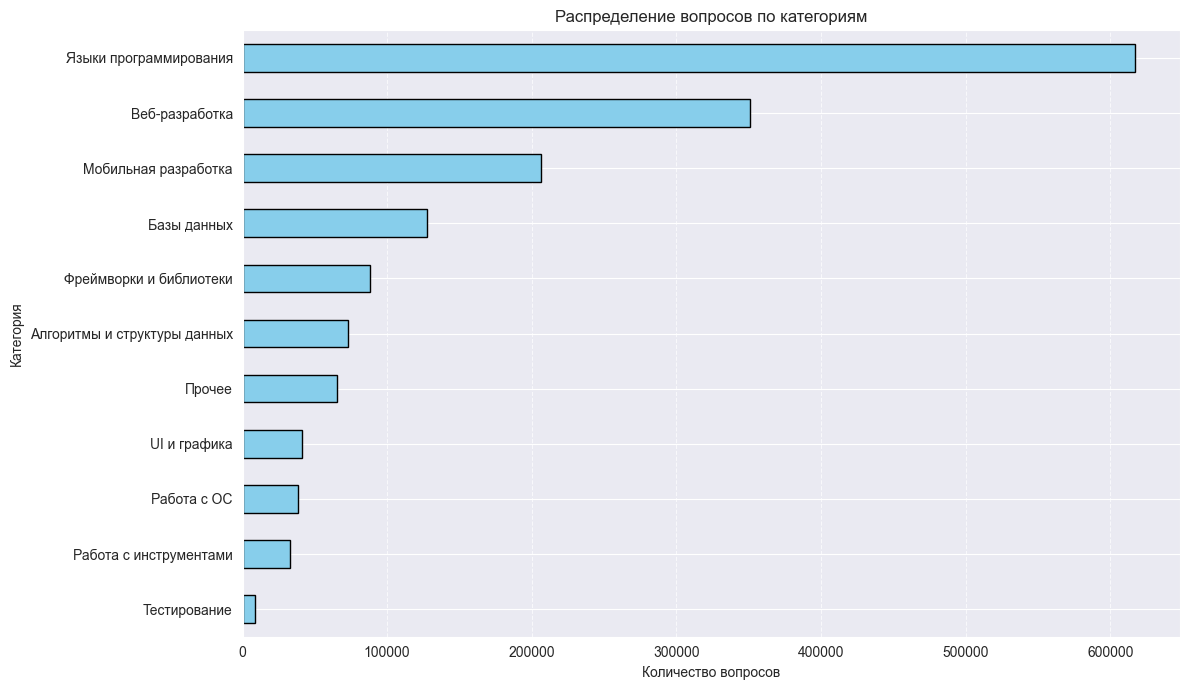

In [13]:
plt.figure(figsize=(12, 7))
category_series = pd.Series(category_counts)
category_series = category_series.sort_values(ascending=True)

category_series.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Распределение вопросов по категориям')
plt.xlabel('Количество вопросов')
plt.ylabel('Категория')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
qa_df["Length_question"] = qa_df['Body_question'].str.len()
qa_df["Length_answer"] = qa_df['Body_answer'].str.len()
print('Средняя длина вопроса:', qa_df["Length_question"].mean())
print('Средняя длина ответа:', qa_df["Length_answer"].mean())

Средняя длина вопроса: 1284.6633826685913
Средняя длина ответа: 741.8621520007783


In [15]:
print(qa_df.isnull().sum())

Id_answer                      0
OwnerUserId_answer         13200
CreationDate_answer            0
ParentId                       0
Score_answer                   0
Body_answer                    0
Id_question                    0
OwnerUserId_question       31893
CreationDate_question          0
ClosedDate               1915448
Score_question                 0
Title                          0
Body_question                  0
clean_questions                0
clear_answers                  0
Length_question                0
Length_answer                  0
dtype: int64


In [16]:
# Вопросы короче 20 символов
short_questions = qa_df[qa_df["Length_question"] < 20]
print(f'Количество подозрительно коротких вопросов: {len(short_questions)}')

Количество подозрительно коротких вопросов: 4


**Первичный анализ и визуализация**

**Описание датасета**

Структура данных: датасет состоит из трёх таблиц: вопросы (Questions.csv), ответы (Answers.csv) и теги (Tags.csv).

Основные поля:

Id, Body, Score, CreationDate в таблице вопросов.

Id, ParentId, Body, Score, CreationDate в таблице ответов.

Id, Tag в таблице тегов.

Чаще всего встречаются вопросы, связанные с языками программирования: javascript, java, c#, php, python.

Также популярны темы веб-разработки (html, css, jquery) и работы с базами данных (mysql, sql).

**Размеры вопросов и ответов**

Средняя длина текста вопроса: примерно 1284 символа.

Средняя длина текста ответа: примерно 741 символ.

Короткие вопросы (менее 20 символов) встречаются редко

Некоторые ответы не имеют соответствующего вопроса (ParentId без связи)

C:\Users\ASUS'\AppData\Local\Temp\ipykernel_22828\951293942.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(qa_df['Length_question'], shade=True, color='lightgreen')


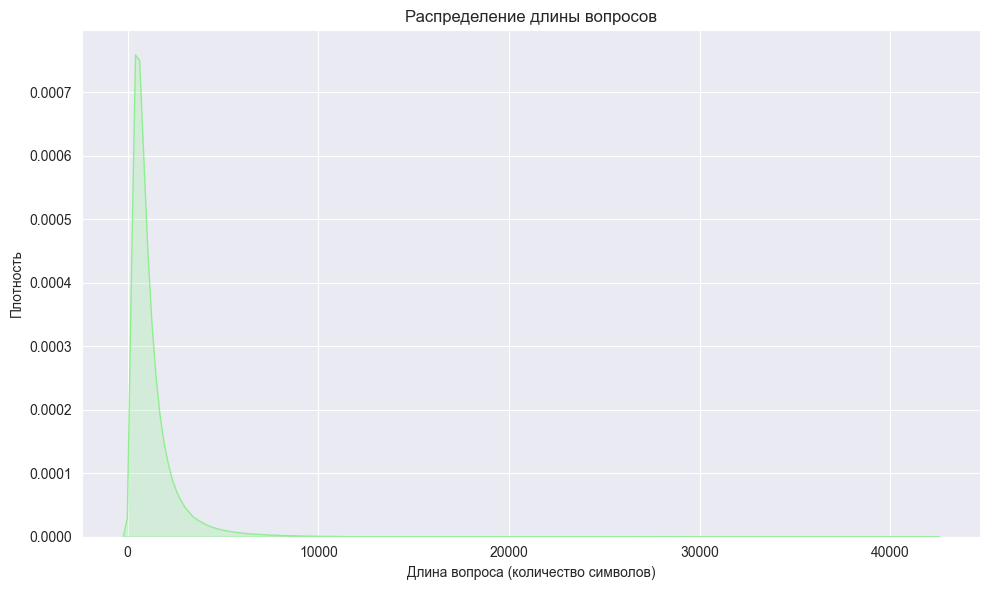

In [17]:
import seaborn as sns

#Строим график плотности для длины ответов
plt.figure(figsize=(10, 6))
sns.kdeplot(qa_df['Length_question'], shade=True, color='lightgreen')
plt.title('Распределение длины вопросов')
plt.xlabel('Длина вопроса (количество символов)')
plt.ylabel('Плотность')
plt.tight_layout()
plt.show()

C:\Users\ASUS'\AppData\Local\Temp\ipykernel_22828\1456323821.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(qa_df['Length_answer'], shade=True, color='lightgreen')


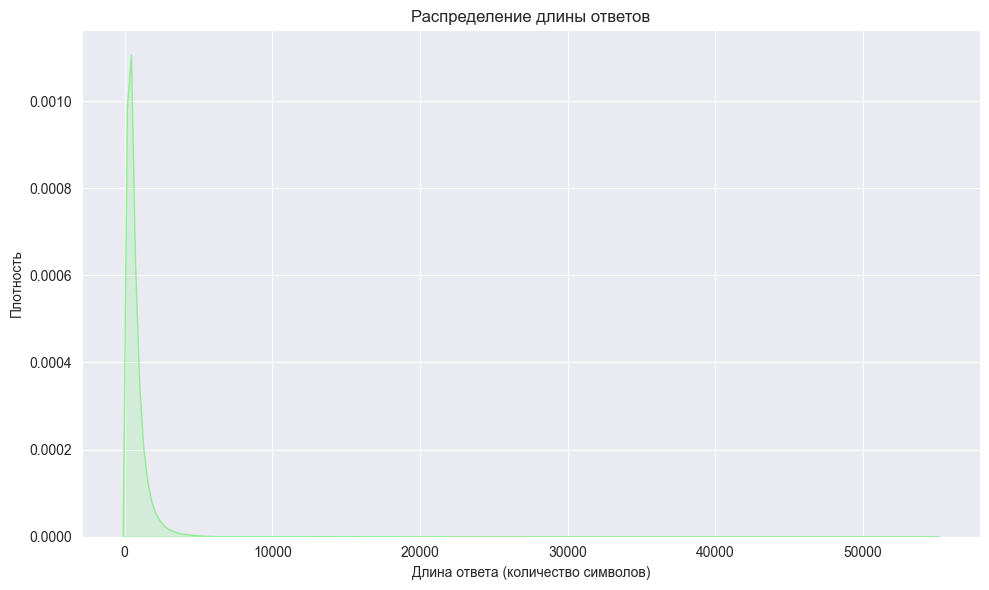

In [18]:
import seaborn as sns
# Строим график плотности для длины ответов
plt.figure(figsize=(10, 6))
sns.kdeplot(qa_df['Length_answer'], shade=True, color='lightgreen')
plt.title('Распределение длины ответов')
plt.xlabel('Длина ответа (количество символов)')
plt.ylabel('Плотность')
plt.tight_layout()
plt.show()